# Sans ou avec le feature "fnwlgt" ? 

Dans ce notebook, on essaie de comparer la performance du modèle regression linéaire sans et avec le feature "fnwlgt"

## Data

In [2]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.model_evaluation import *

# Import the data
from data.data_extract import load_data

In [3]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Test avec le feature "fnwlgt"

In [4]:
df = df_data.copy()
df = fix_target(df)
df = df.drop("education", axis=1)
df = drop_outliers(df)
df = regroupe_categories(df)

In [5]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0


In [6]:
df.shape

(48592, 14)

In [7]:
df.duplicated().sum()

48

In [8]:
df = df.drop_duplicates()

In [9]:
df_train, df_test = seperate_train_test(df, random_state=42)

In [10]:
cat_features = get_cat_features(df)
cont_features = get_cont_features(df)

In [11]:
df_train,df_test = impute_missing_cat_values(df_train, df_test,cat_features,strategy='most_frequent')


In [12]:
cont_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [13]:
df_train,df_test = standardize(df_train, df_test, cont_features)

In [14]:
df_train,df_test = encode_cat_features_onehot(df_train, df_test, cat_features)

In [15]:
df_train.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,>50K,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Germany,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States,education-num_-3.539318909293474,education-num_-3.1485910927659706,education-num_-2.757863276238467,education-num_-2.367135459710964,education-num_-1.9764076431834607,education-num_-1.5856798266559575,education-num_-1.194952010128454,education-num_-0.8042241936009509,education-num_-0.41349637707344755,education-num_-0.022768560545944276,education-num_0.36795925598155904,education-num_0.7586870725090623,education-num_1.1494148890365656,education-num_1.5401427055640688,education-num_1.9308705220915723,education-num_2.3215983386190757
0,-0.993898,0.070748,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.484253,-0.295999,-0.231956,-0.218153,-2.692497,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.500811,-0.587359,1.052857,-0.218153,-0.031402,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.243811,-1.052597,-0.231956,-0.218153,4.000560,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.265834,0.008732,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_train.shape

(38835, 65)

In [17]:
df_test.shape

(9709, 65)

In [18]:
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=7)

In [19]:
df.duplicated().sum()

0

In [20]:
df_train_select = df_train.drop('>50K', axis=1)
df_test_select = df_test.drop('>50K', axis=1)
target_train = df_train['>50K']
target_test = df_test['>50K']


In [21]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values


In [22]:
df_train.shape

(38835, 65)

In [23]:
df_test.shape

(9709, 65)

In [24]:
df_train.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,>50K,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Germany,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States,education-num_-3.539318909293474,education-num_-3.1485910927659706,education-num_-2.757863276238467,education-num_-2.367135459710964,education-num_-1.9764076431834607,education-num_-1.5856798266559575,education-num_-1.194952010128454,education-num_-0.8042241936009509,education-num_-0.41349637707344755,education-num_-0.022768560545944276,education-num_0.36795925598155904,education-num_0.7586870725090623,education-num_1.1494148890365656,education-num_1.5401427055640688,education-num_1.9308705220915723,education-num_2.3215983386190757
0,-0.993898,0.070748,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.484253,-0.295999,-0.231956,-0.218153,-2.692497,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.500811,-0.587359,1.052857,-0.218153,-0.031402,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.243811,-1.052597,-0.231956,-0.218153,4.000560,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.265834,0.008732,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
## Régression logistique
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Regression logistique

Matrice de confusion:
[[6928  494]
 [ 987 1300]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.746112 



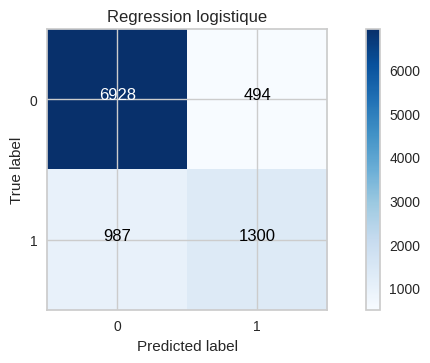

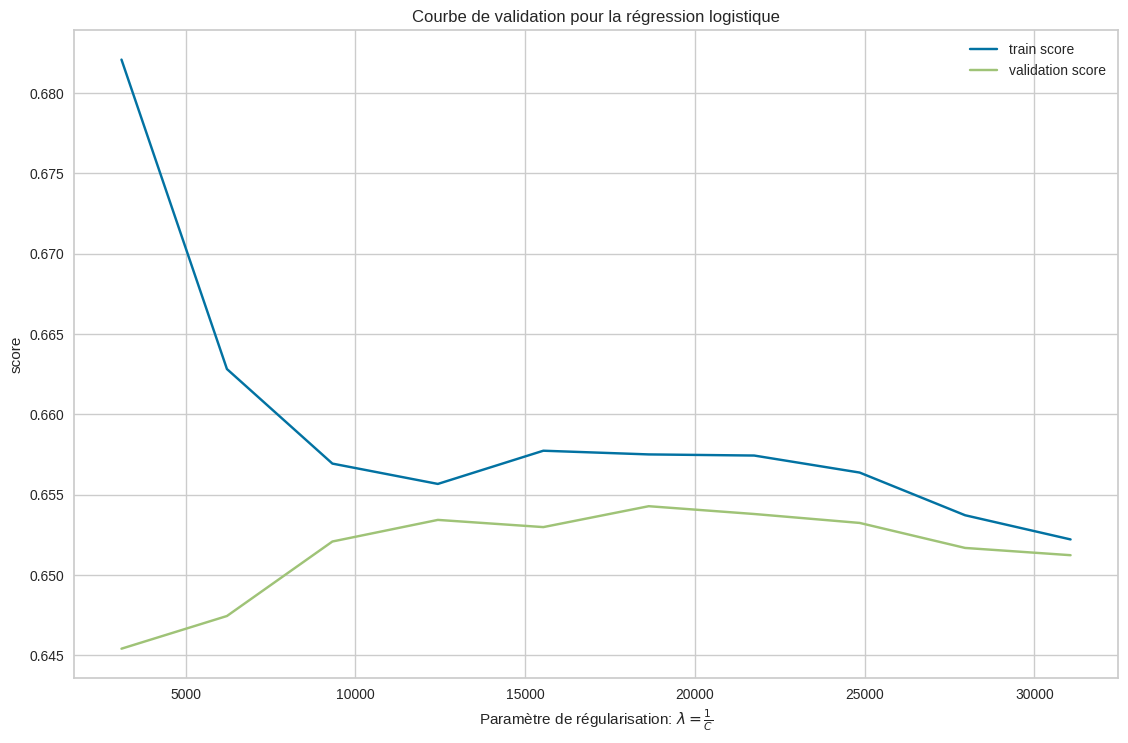

In [26]:
plot_confusion_matrix_sns(y_test, y_pred, "Regression logistique")
N, train_score, val_score = learning_curve(logreg, X_train, y_train, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe de validation pour la régression logistique")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

Le modèle est en sous-apprentissage. Cela peut être dû à un jeu de données déséquilibré. Cependant, le fossé entre le score d'entraînement et le score de test diminue avec l'augmentation de la taille de l'échantillon, ce qui est quelque peu encourageant.

Nous soupcionnons sur l'utilité du feature 'fnwlgt'. Le coefficient de pondération peut ne pas avoir un impact sur les resultats de classification. Nous testons alors sans le feature 'fnwlgt'

## Test sans le feature 'fnwlgt'

In [27]:
# supprimer fnwgt dans df_test et df_train
df_train = df_train.drop('fnlwgt', axis=1)
df_test = df_test.drop('fnlwgt', axis=1)


In [28]:
df_train.head()

,age,capital-gain,capital-loss,hours-per-week,>50K,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Germany,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States,education-num_-3.539318909293474,education-num_-3.1485910927659706,education-num_-2.757863276238467,education-num_-2.367135459710964,education-num_-1.9764076431834607,education-num_-1.5856798266559575,education-num_-1.194952010128454,education-num_-0.8042241936009509,education-num_-0.41349637707344755,education-num_-0.022768560545944276,education-num_0.36795925598155904,education-num_0.7586870725090623,education-num_1.1494148890365656,education-num_1.5401427055640688,education-num_1.9308705220915723,education-num_2.3215983386190757
0,-0.993898,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.484253,-0.231956,-0.218153,-2.692497,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.500811,1.052857,-0.218153,-0.031402,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.243811,-0.231956,-0.218153,4.000560,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.265834,-0.231956,-0.218153,-0.031402,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_train.shape

(38835, 64)

In [30]:
df_test.shape

(9709, 64)

In [31]:
df_train.duplicated().sum()

4669

In [32]:
df_test = df_test.drop_duplicates()
df_train = df_train.drop_duplicates()

In [33]:
df_test.shape

(9239, 64)

In [34]:
df_train.shape

(34166, 64)

In [35]:
X_train = df_train.values
X_test = df_test.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values

In [36]:
len(X_train)

34166

In [37]:
len(y_train)

34166

In [38]:
len(X_test)

9239

In [39]:
len(y_test)

9239

Regression logistique

Matrice de confusion:
[[7030    0]
 [   0 2209]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7030
           1       1.00      1.00      1.00      2209

    accuracy                           1.00      9239
   macro avg       1.00      1.00      1.00      9239
weighted avg       1.00      1.00      1.00      9239
 

Exactitude: 100.000000 



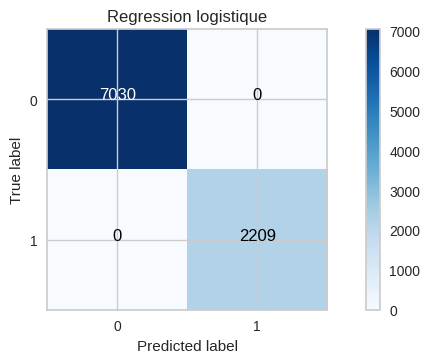

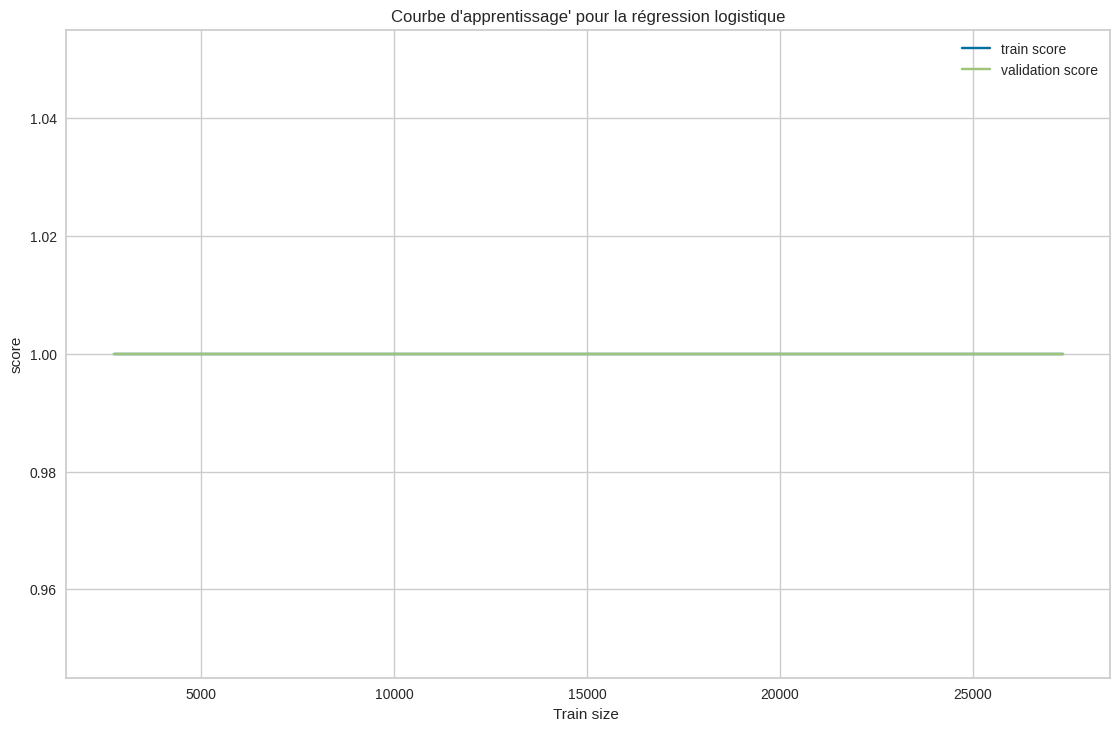

In [40]:
## Régression logistique
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# reload the module data_preprocessing
plot_confusion_matrix_sns(y_test, y_pred, "Regression logistique")
N, train_score, val_score = learning_curve(logreg, X_train, y_train, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe d'apprentissage' pour la régression logistique")
plt.ylabel('score')
plt.xlabel('Train size ')
plt.show()

Nous remarquons qu'en supprimant le feature "fnwlgt" nous obtiendrons un modèle parfait. Cependant on risque de perdre des informations vu qu'on a supprimé 4669 duplications générés par la suppression de la colonne